<a href="https://colab.research.google.com/github/epignatelli/fenton_karma_jax/blob/master/fenton_karma_jax_cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from timeit import timeit
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

### Profile `gradient`
---

In [149]:
def profile_matmul(sizes):
    results_np = []
    results_jax = []
    for size in sizes:
        print("Profiling with size %s" % size)
        x_np = np.random.randn(200, size)
        y_np = np.random.randn(size, 200)

        key = jax.random.PRNGKey(1)
        x_jax = jax.random.normal(key, (100, size))
        y_jax = jax.random.normal(key, (size, 100))

        result_np_single = %timeit -n10 -o np.matmul(x_np, y_np)
        result_jax_single = %timeit -n10 -o jnp.matmul(x_jax, y_jax).block_until_ready()
        
        results_np.append(result_np_single)
        results_jax.append(result_jax_single)    
    return result_np, result_jax


def profile_gradient(shapes):
    results_np = []
    results_jax = []
    for shape in shapes:
        print("Profiling with size %s" % size)
        x_np = np.random.randn(*shape)
    
        key = jax.random.PRNGKey(1)
        x_jax = jax.random.normal(key, shape)
    
        result_np_single = %timeit -n10 -o np.gradient(x_np)
        result_jax_single = %timeit -n10 -o jnp.gradient(x_jax).block_until_ready()
        
        results_np.append(result_np_single)
        results_jax.append(result_jax_single)   
    return results_np, result_jax


def plot(results_np, results_jax):
    np_averages = np.array([x.average for x in results_np])
    np_stds = np.array([x.stdev for x in results_np])

    jax_averages = np.array([x.average for x in results_jax])
    jax_stds = np.array([x.stdev for x in results_jax])
    
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(np_averages)
    ax.fill_between(range(len(np_averages)), np_averages + np_stds, np_averages - np_stds, alpha=0.3)
    ax.plot(jax_averages)
    ax.fill_between(range(len(jax_averages)), jax_averages + jax_stds, jax_averages - jax_stds, alpha=0.3)
    fig.legend(labels=["np", "jax"])
    plt.show()

In [144]:
profile_matmul

Profiling with size 0
30.8 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
128 µs ± 14.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Profiling with size 100
115 µs ± 6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 4.21 times longer than the fastest. This could mean that an intermediate result is being cached.
313 µs ± 216 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Profiling with size 200
246 µs ± 7.57 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
282 µs ± 53.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Profiling with size 300
354 µs ± 20.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
291 µs ± 25.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Profiling with size 400
469 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
414 µs ± 192 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Profiling with size 500
563 µs ± 45.6 µs per loop (mean ± std. dev. of

#### `numpy`

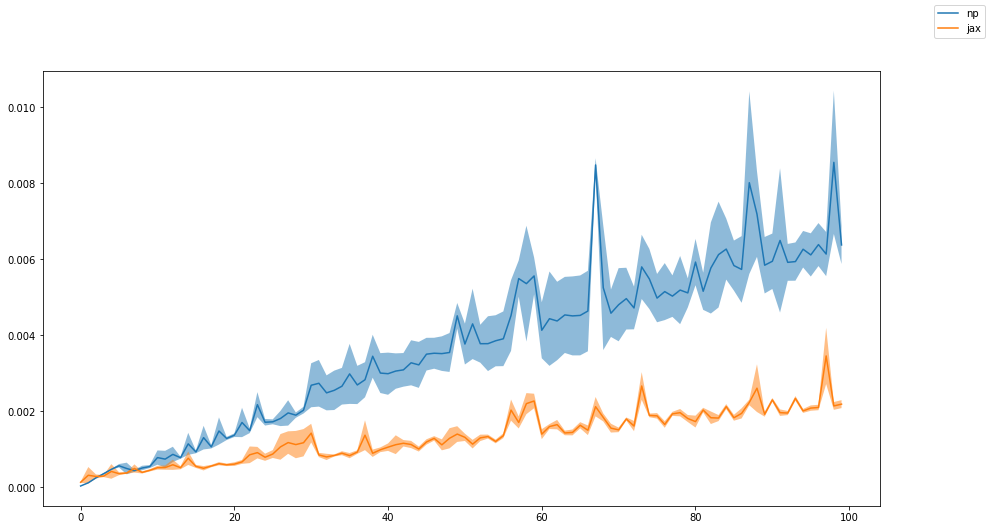

In [146]:

plot(results_np, results_jax)

In [29]:
ones = np.ones((100, 100, 100))
result_numpy = %timeit -o np.gradient(ones)
result_numpy.average

12.7 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


0.012745180545715423

#### `jax`

In [30]:
grad = jax.jit(jnp.gradient)
ones = jnp.ones((100, 100, 100))
result_jax = %timeit -o grad(ones)
result_jax.average

2.21 ms ± 53.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


0.002210476161429012

### Profile `matmul`
---

#### `numpy`

In [125]:
x = np.random.randn(1000, 200)
y = np.random.randn(200, 1000)
timeit("np.matmul(x, y)")

NameError: name 'np' is not defined

#### `jax`

In [4]:
# function to profile
func = jax.jit(jnp.matmul)

key = jax.random.PRNGKey(1)

for i in range(1000):
    x = jax.random.normal(key, (1000, i))
    y = jax.random.normal(key, (i, 1000))
    %timeit func(x, y).block_until_ready()

1.7 ms ± 52.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
timeit("matmul(x, y)")

6.88 ns ± 0.216 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
